# The `xarray.DataArray` stucture for uvecs

`xarrayuvecs` propose a accessor for `xarray.DataArray` to work on "**U**nit **VEC**ctor that are **S**ymmetrical" (**UVECS**).

In this case symetrical mean that a vector **x** has the same meaning than **-x**. Therefore is can be usefull to describe non directional orientation such as crystallographic orientation dor instance.

In this notebook we will show what can be done using `xarrayuvec` accessor.

In [1]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa
import xarrayuvecs.uvecs as xu
import xarrayuvecs.lut2d as lut2d

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr

Load data

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In [3]:
data=lda.aita5col(path_data,path_micro)

In [4]:
data

<xarray.Dataset>
Dimensions:      (uvecs: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: uvecs
Data variables:
    orientation  (y, x, uvecs) float64 2.395 0.6451 5.377 ... 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes:
    date:       Thursday, 19 Nov 2015, 11:24 am
    unit:       millimeters
    step_size:  0.02
    path_dat:   orientation_test.dat

## What is an `xarrayuvecs` `DataArray` ?

In [5]:
data.orientation.head(2)

<xarray.DataArray 'orientation' (y: 2, x: 2, uvecs: 2)>
array([[[2.39476627, 0.64507369],
        [5.37718489, 1.04999008]],

       [[5.35955707, 1.15837502],
        [5.35885894, 1.12975162]]])
Coordinates:
  * x        (x) float64 0.0 0.02
  * y        (y) float64 49.98 49.96
Dimensions without coordinates: uvecs

`xarrayuvecs` accessor should be used on `xarray.DataArray` **da** that have a dimension of $m\times n \times 2$. The **da[:,:,0]** correspond to the azimuth $\Phi$ coordinate of the unit vector and **da[:,:,1]** to the colatitude $\theta$.

![Definition of the Azimuth and Colatitude.}](Azi_Col_Def.png)

Text(0.5, 1.0, 'colatitude $\theta$')

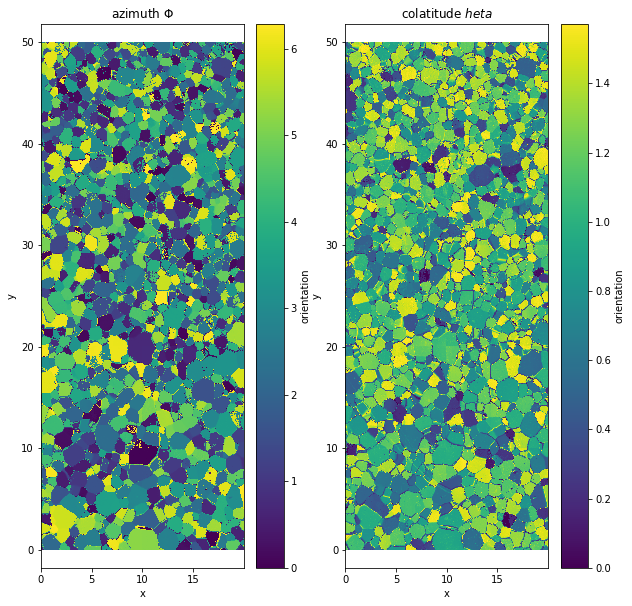

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
data.orientation[:,:,0].plot()
plt.axis('equal')
plt.title('azimuth $\Phi$')
plt.subplot(1,2,2)
data.orientation[:,:,1].plot()
plt.axis('equal')
plt.title('colatitude $\theta$')

## Export different coordinate system
### Bunge Euler convention

The Bunge Euler convention is widely use in crystallographic community.

1. $\phi_1$ is the rotation around $Oz$
2. $\phi$ is the rotation around $Ou$

![Definition of the Bunge Euler angle.](DefBungeEuler.png)

In [7]:
data['Bunge_Euler']=data.orientation.uvecs.bunge_euler()

Text(0.5, 1.0, 'phi')

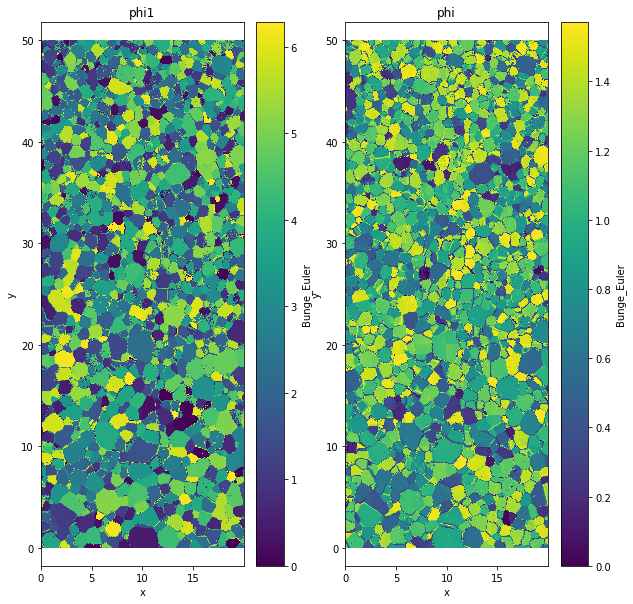

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
data.Bunge_Euler[:,:,0].plot()
plt.axis('equal')
plt.title('phi1')
plt.subplot(1,2,2)
data.Bunge_Euler[:,:,1].plot()
plt.axis('equal')
plt.title('phi')

### Cartesien coordinate
You can also extract the vector in cartesien coordinate. 

In [9]:
data['oXYZ']=data.orientation.uvecs.xyz()

Text(0.5, 1.0, 'Z')

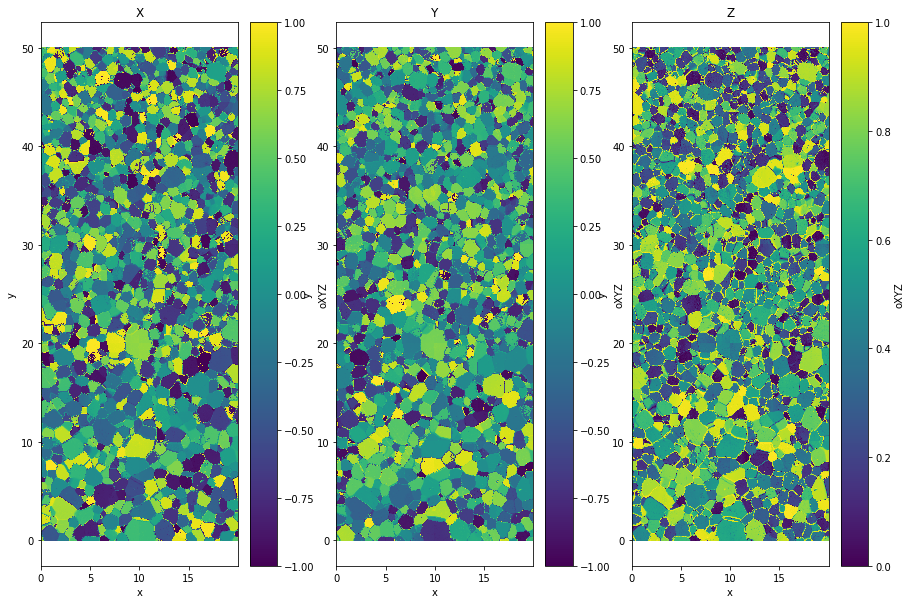

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
data.oXYZ[:,:,0].plot(cmap=cm.viridis)
plt.axis('equal')
plt.title('X')
plt.subplot(1,3,2)
data.oXYZ[:,:,1].plot(cmap=cm.viridis)
plt.axis('equal')
plt.title('Y')
plt.subplot(1,3,3)
data.oXYZ[:,:,2].plot(cmap=cm.viridis)
plt.axis('equal')
plt.title('Z')

## Colormap
Colormap plotting the orientation can be done using colorwheel.
### Full colorwheel
The colorcode used to display one orientation is choosen using a given colorwheel (show below). Using the "Full Colorwheel" will display a unique color for all the same orientation.

1. a black pixel display an orientation along the z-axis $(0,0,1)$
2. a red pixel display an orientation along the minus x-axis $(-1,0,0)$
2. a blue pixel display an orientation along the $\left(\frac{\sqrt(2)}{2},\frac{-\sqrt(2)}{2},0\right)$

This representation is quite usefull but is not exempt of default. For instance The color codding is discontinous. That mean that vectors $\left(1,0,+\delta_z\right)$ and $\left(1,0,-\delta_z\right)$ show very defferent color (pale blue and red) even if the angle between both decrease to 0 as $\delta_z$ decrease to 0.

Text(0.5, 1.0, 'Full colorwheel')

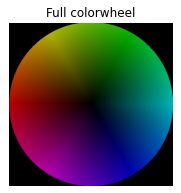

In [11]:
lut_f=lut2d.lut()
plt.figure(figsize=(3,3))
plt.imshow(lut_f)
plt.axis('equal')
plt.axis('off')
plt.title('Full colorwheel')

The colormap associated with this colorwheel can be compute using `xarrayuvecs`

In [12]:
data['FullColormap']=data.orientation.uvecs.calc_colormap()

(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

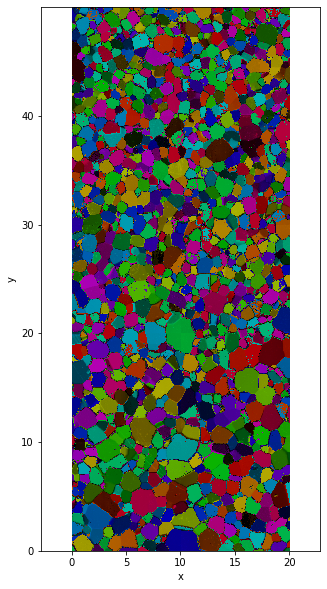

In [13]:
plt.figure(figsize=(5,10))
data.FullColormap.plot.imshow()
plt.axis('equal')

### Semi colorwheel
The semi colorwheel is an over represntation of the orientation. It has the advantage to not have any discountinuities but **one color does not correspond to a unique orientation**.

```{warning}
$(x,y,z)$ and $(-x,-y,z)$ share the same colorcoding.
```

Text(0.5, 1.0, 'Semi colorwheel')

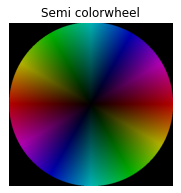

In [14]:
lut_s=lut2d.lut(semi=True)
plt.figure(figsize=(3,3))
plt.imshow(lut_s)
plt.axis('equal')
plt.axis('off')
plt.title('Semi colorwheel')

In [15]:
data['SemiColormap']=data.orientation.uvecs.calc_colormap(semi=True)

(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

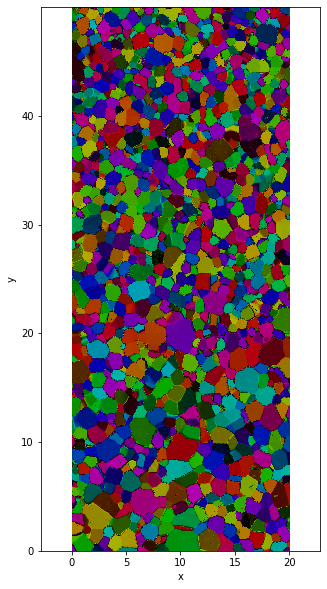

In [16]:
plt.figure(figsize=(5,10))
data.SemiColormap.plot.imshow()
plt.axis('equal')

## The ODF
The Orientation Density Function (ODF) is a probability density function for orientation. Therefore it's integral over the sphere is equal to 1.

It is evaluated using a [Kernel Density Estimation](https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation) (KDE) with a gaussian kernel.

```{warning}
Therefore the representation is quite sensitive to the 'bandwidth' **bw** paramerter of the gaussian kernel and should be choosen carefully.
```

Text(0.5, 1.0, 'bw=2')

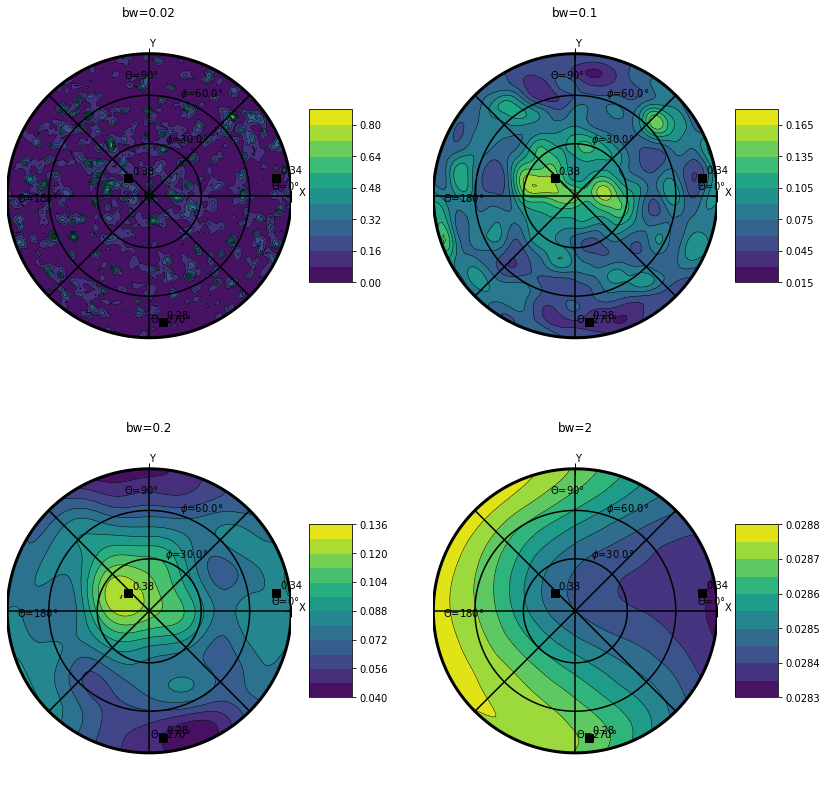

In [17]:
plt.figure(figsize=(14,14))
plt.subplot(221)
data.orientation.uvecs.plotODF(bw=0.02,cmap=cm.viridis)
plt.title('bw=0.02')
plt.subplot(222)
data.orientation.uvecs.plotODF(bw=0.1,cmap=cm.viridis)
plt.title('bw=0.1')
plt.subplot(223)
data.orientation.uvecs.plotODF(bw=0.2,cmap=cm.viridis)
plt.title('bw=0.2')
plt.subplot(224)
data.orientation.uvecs.plotODF(bw=2.,cmap=cm.viridis)
plt.title('bw=2')